# Scrapping Data (Run Once)





> Scrapping Ruang Guru Reviews Google Play



In [ ]:
# Install Library Google Play Scrapper
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00


In [ ]:
# Import Library
import pandas as pd
from google_play_scraper import app, Sort, reviews

In [ ]:
from datetime import time

# Set Google Play App ID
APP_ID = 'com.ruangguru.livestudents'     # Example: com.whatsapp, com.kai
LANG = 'id'                               # Language code (en, fr, es, etc.)
COUNTRY = 'id'                            # Country code (us, fr, etc.)
TARGET_COUNT = 11000                      # Total number of reviews to scrape
BATCH_SIZE = 200                          # Maximum reviews per request

def run_scraper():
    # Get app info
    try:
        app_info = app(APP_ID)
        print(f"\n📱 App Name: {app_info['title']}")
        print(" \nAverage Rating: {app_info['score']}")
        print(" \nInstalls: {app_info['installs']}")
        print(" \nGenre: {app_info['genre']}\n")
    except Exception as e:
        print(f"\n Error getting app info: {str(e)}")
        return

    all_reviews = []
    count = 0
    next_token = None  # Pagination token

    print("⏳ Scraping reviews...")
    while count < TARGET_COUNT:
        try:
            result, next_token = reviews(
                app_id=APP_ID,
                lang=LANG,
                country=COUNTRY,
                sort=Sort.NEWEST,
                count=BATCH_SIZE,  # Max per request
                continuation_token=next_token,  # Pagination token
            )

            if not result:
                break  # Stop if no more reviews

            all_reviews.extend(result)
            count = len(all_reviews)
            print(f"✅ Scraped {count} reviews...")

            if next_token is None:  # Stop when no more pages
                break

        except Exception as e:
            print(f"❌ Error scraping reviews: {str(e)}")
            break

    # Process reviews  #This line and the following lines were incorrectly indented
    reviews_df = pd.DataFrame([{
        'ulasan': review['content'],
    } for review in all_reviews])

    # Show preview
    print(f"\n✅ Successfully scraped {len(reviews_df)} reviews!")
    print("\nPreview of reviews:")
    display(reviews_df.head(5))

    # Save to CSV
    csv_filename = f"{APP_ID}_reviews.csv"
    reviews_df.to_csv(csv_filename, index=False)

In [ ]:
# Run the scraper (Don't run it again if not want to use new data)
run_scraper()


📱 App Name: Ruangguru: Bimbel SD SMP SMA
 
Average Rating: {app_info['score']}
 
Installs: {app_info['installs']}
 
Genre: {app_info['genre']}

⏳ Scraping reviews...
✅ Scraped 200 reviews...
✅ Scraped 400 reviews...
✅ Scraped 600 reviews...
✅ Scraped 800 reviews...
✅ Scraped 1000 reviews...
✅ Scraped 1200 reviews...
✅ Scraped 1400 reviews...
✅ Scraped 1600 reviews...
✅ Scraped 1800 reviews...
✅ Scraped 2000 reviews...
✅ Scraped 2200 reviews...
✅ Scraped 2400 reviews...
✅ Scraped 2600 reviews...
✅ Scraped 2800 reviews...
✅ Scraped 3000 reviews...
✅ Scraped 3200 reviews...
✅ Scraped 3400 reviews...
✅ Scraped 3600 reviews...
✅ Scraped 3800 reviews...
✅ Scraped 4000 reviews...
✅ Scraped 4200 reviews...
✅ Scraped 4400 reviews...
✅ Scraped 4600 reviews...
✅ Scraped 4800 reviews...
✅ Scraped 5000 reviews...
✅ Scraped 5200 reviews...
✅ Scraped 5400 reviews...
✅ Scraped 5600 reviews...
✅ Scraped 5800 reviews...
✅ Scraped 6000 reviews...
✅ Scraped 6200 reviews...
✅ Scraped 6400 reviews...
✅ Scr

,ulasan
0,"Mantap, pelajaran yang kukuasai saat SNBT ingi..."
1,bagus banget bisa buat belajar lebih giat lagi...
2,"stop ngirim spam, kirain quisioner beneran nga..."
3,mantap jadi aku bisa paham soal MTK 😁😁
4,Luar biasa


# Preparing Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/com.ruangguru.livestudents_reviews.csv')

In [3]:
# Getting info of dataset.
df.describe()

,ulasan
count,11000
unique,9380
top,Bagus
freq,314


In [4]:
# Drop empty values
df.drop(df[df['ulasan'].isna()].index, inplace=True)
df.drop(df[df['ulasan'] == ''].index, inplace=True)

# Preprocessing Data

In [5]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 13.2 MB/s eta 0:00:00


In [6]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # delete mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # delete hashtag
    text = re.sub(r'RT[\s]', '', text) # delete RT
    text = re.sub(r"http\S+", '', text) # delete link
    text = re.sub(r'[0-9]+', '', text) # delete number
    text = re.sub(r'[^\w\s]', '', text) # delete character expect number and alphabet

    text = text.replace('\n', ' ') # change new line to whitespace
    text = text.translate(str.maketrans('', '', string.punctuation)) # delete punctuation
    text = text.strip(' ') # remove whitespace
    return text

def casefoldingText(text): # lowercase text
    text = text.lower()
    return text

def tokenizingText(text): # tokenizing text
    text = word_tokenize(text)
    return text

def filteringText(text): # delete stopwords in text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy","anjirr","anjir","anjay","lah"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Stemming text (Not Used, Too Heavy)
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Change word list to sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [8]:
import requests
import os
import json

slangwords = {}
url = "https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/refs/heads/master/combined_slang_words.txt"
file_path = "/content/slangwords.txt"

# Check if file exits
if not os.path.exists(file_path):
    response = requests.get(url)

    if response.status_code == 200:
        # save file
        with open(file_path, "wb") as file:
            file.write(response.content)
    else:
        print("Failed to download slang words.")
        slangwords = {}
        exit()

# Read from local file
with open(file_path, "r", encoding="utf-8") as file:
    slangwords = json.load(file)  # Parse JSON from file .txt

# preview
print(f"Loaded {len(slangwords)} slang words.")
print(list(slangwords.items())[:10])


Loaded 1018 slang words.
[('@', 'di'), ('abis', 'habis'), ('ad', 'ada'), ('adlh', 'adalah'), ('afaik', 'as far as i know'), ('ahaha', 'haha'), ('aj', 'saja'), ('ajep-ajep', 'dunia gemerlap'), ('ak', 'saya'), ('akika', 'aku')]


In [9]:
extended_slangwords = {
    "kukuasai": "kuasai",
    "quisioner": "kuisioner",
    "trs": "terus",
    "gk": "nggak",
    "bgt": "banget",
    "aj": "aja",
    "tdk": "tidak",
    "mantab": "mantap",
    "bljr": "belajar",
    "bgus": "bagus",
    "nga": "nggak",
    "baget": "banget",
    "bsa": "bisa",
    "skli": "sekali",
    "bosan": "membosankan",
    "bosen": "membonsankan"
}

slangwords.update(extended_slangwords)

In [10]:
print(f"Now have {len(slangwords)} slang words.")

Now have 1029 slang words.


In [11]:
def fix_slangwords(text): # Fix Slangwords
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [12]:
# Apply all preprocessing process
df['ulasan'] = df['ulasan'].apply(cleaningText)
df['ulasan'] = df['ulasan'].apply(casefoldingText)
df['ulasan'] = df['ulasan'].apply(fix_slangwords)
df['ulasan'] = df['ulasan'].apply(tokenizingText)
df['ulasan'] = df['ulasan'].apply(filteringText)
df['ulasan'] = df['ulasan'].apply(toSentence)

print("Preprocessing finished!")

Preprocessing finished!


In [13]:
# check '' values of df['ulasan']
print(df[df['ulasan'] == ''])

      ulasan
4           
130         
199         
283         
366         
...      ...
10892       
10933       
10953       
10957       
10999       

[292 rows x 1 columns]


In [14]:
# drop the empty values of sentiment neutral
df.drop(df[df['ulasan'] == ''].index, inplace=True)
print(df[df['ulasan'] == ''])

Empty DataFrame
Columns: [ulasan]
Index: []


# Labeling Process

In [15]:
import csv
import requests

In [16]:
# The Positive & Negative Lexicon is from (https://github.com/fajri91/InSet)
negative_lexicon_url = "https://raw.githubusercontent.com/fajri91/InSet/refs/heads/master/negative.tsv"
response = requests.get(negative_lexicon_url)

if response.status_code == 200:
    # Download the file
    with open("lexicon_negative.tsv", "wb") as file:
        file.write(response.content)
    print("Success download lexicon negative")
else :
  print("Failed to download lexicon negative")


positive_lexicon_url = "https://raw.githubusercontent.com/fajri91/InSet/refs/heads/master/positive.tsv"
response = requests.get(positive_lexicon_url)

if response.status_code == 200:
    # Download the file
    with open("lexicon_positive.tsv", "wb") as file:
        file.write(response.content)
    print("Success download lexicon positive")
else :
  print("Failed to download lexicon positive")

Success download lexicon negative
Success download lexicon positive


In [17]:
# Load lexicons from TSV file
def load_lexicon(tsv_file, type="tsv"):
    lexicon = dict()
    if type == "tsv":
        with open(tsv_file, "r", encoding="utf-8") as file:
            reader = csv.reader(file, delimiter="\t")  # Assuming TSV format
            next(reader) # Skip Header
            for row in reader:
              lexicon[row[0]] = int(row[1])

    elif type == "csv":
        with open(tsv_file, "r", encoding="utf-8") as file:
            reader = csv.reader(file)  # Assuming CSV format
            next(reader) # Skip Header
            for row in reader:
              lexicon[row[0]] = int(row[1])
    return lexicon

In [18]:
negative_lexicon = load_lexicon("/content/lexicon_negative.tsv")
positive_lexicon = load_lexicon("/content/lexicon_positive.tsv")

In [19]:
print("Length of Negative Lexicon : ", len(negative_lexicon))
print("Length of Positive Lexicon : ", len(positive_lexicon))

Length of Negative Lexicon :  6607
Length of Positive Lexicon :  3609


In [20]:
def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word in text.split():
    if word in positive_lexicon:
      score += positive_lexicon[word]
    elif word in negative_lexicon:
      score += negative_lexicon[word]

  if score > 0:
    sentiment = "positive"
  elif score < 0:
    sentiment = "negative"
  else:
    sentiment = "neutral"

  return score, sentiment

In [21]:
sentiment_results = df['ulasan'].apply(sentiment_analysis_lexicon_indonesia)
sentiment_results = list(zip(*sentiment_results))
df['score'] = sentiment_results[0]
df['sentiment'] = sentiment_results[1]

print("Sentiment Analysis Finished!")
print(df['sentiment'].value_counts())

Sentiment Analysis Finished!
sentiment
positive    7740
neutral     1616
negative    1352
Name: count, dtype: int64


In [22]:
positive_df = df[df['sentiment'] == 'positive']
positive_df.tail(5)

,ulasan,score,sentiment
10991,berguna tambahkan fitur bahasa jawa pai,1,positive
10992,bermanfaat mudah pahami terima kasih ruang guru,13,positive
10993,terimakasih ruang guru nilai maksimal diterima...,18,positive
10996,tiada duanya aplikasi belajar membantu menarik,8,positive
10997,appnya bagus,2,positive


In [23]:
neutral_df = df[df['sentiment'] == 'neutral']
neutral_df.head(5)

,ulasan,score,sentiment
13,membonsankan,0,neutral
16,bolehhh meningkat berpikir kuu,0,neutral
20,mencari bikin emosi,0,neutral
25,seruuu pollll,0,neutral
26,okey,0,neutral


In [24]:
negative_df = df[df['sentiment'] == 'negative']
negative_df.head(5)

,ulasan,score,sentiment
5,bug min drill gabisa sub bab gamuncul gagal dr...,-8,negative
8,keren semoga bimbel utbk ruangguru berhasil lo...,-1,negative
19,kak tolongin dongapk ruangguru bukakatanya sis...,-6,negative
36,aplikasi bagus,-2,negative
38,kayla belajar fisika aplikasi ruangguru,-1,negative


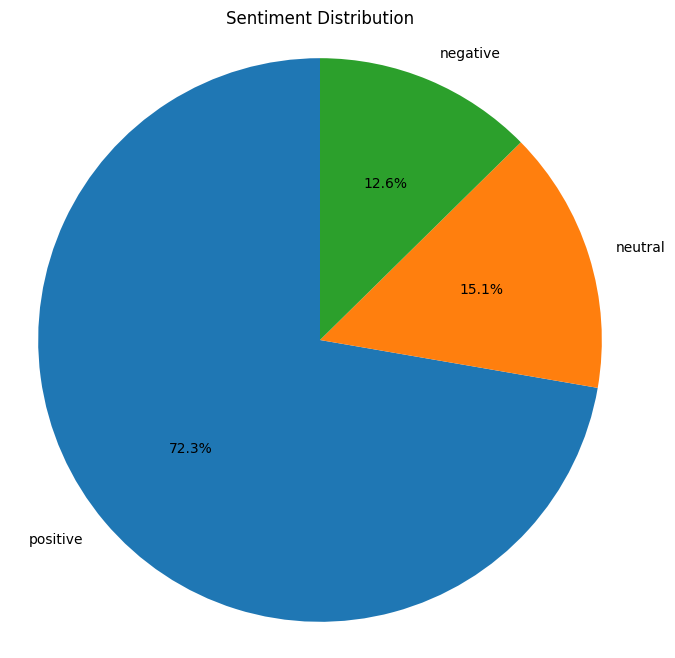

In [25]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

# Modeling, Data Sampling & Extracting

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import LabelEncoder

## Sampling Unbalanced Dataset with RandomOverSampler

In [27]:
X = df['ulasan']
y = df['sentiment']
print("Distribusi sebelum oversampling:\n", df['sentiment'].value_counts())

# Random Sampling Unbalanced Dataset
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X.values.reshape(-1, 1), y)
X_resampled = X_resampled.flatten()

df_random_sampling = pd.DataFrame({'ulasan': X_resampled, 'sentiment': y_resampled})

print("Distribusi setelah oversampling:\n", df_random_sampling['sentiment'].value_counts())

Distribusi sebelum oversampling:
 sentiment
positive    7740
neutral     1616
negative    1352
Name: count, dtype: int64
Distribusi setelah oversampling:
 sentiment
positive    7740
negative    7740
neutral     7740
Name: count, dtype: int64


## TF-IDF Extractraction & Modelling (ML : Naive Bayes & Logistic Regression)

In [28]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_tfIdf = vectorizer.fit_transform(X_resampled)

### Model Training Naive Bayes (TF-IDF | Train Test Set (80:20))



In [29]:
from sklearn.naive_bayes import MultinomialNB

# Train-test split
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfIdf, y_resampled, test_size=0.2, random_state=42)

# Using Multinomial NB
naive_bayes = MultinomialNB()

# Train Model
naive_bayes.fit(X_train_tfidf.toarray(), y_train_tfidf)

# Sentiment Prediction on Data Training & Testing
y_pred_train_nb = naive_bayes.predict(X_train_tfidf.toarray())
y_pred_test_nb = naive_bayes.predict(X_test_tfidf.toarray())

# Accuracy Evaluation
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train_tfidf)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test_tfidf)

print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.9049310938845823
Naive Bayes - accuracy_test: 0.872093023255814


### Model Training Logistic Regression (TF-IDF | Train Test Set (70:30))

In [30]:
from sklearn.linear_model import LogisticRegression

# Train-test split
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfIdf, y_resampled, test_size=0.3, random_state=42)

# Using Logistic Regression
logistic_regression = LogisticRegression()

# Train Model
logistic_regression.fit(X_train_tfidf.toarray(), y_train_tfidf)

# Sentiment Prediction on Data Training & Testing
y_pred_train_lr = logistic_regression.predict(X_train_tfidf.toarray())
y_pred_test_lr = logistic_regression.predict(X_test_tfidf.toarray())

# Accuracy Evaluation
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train_tfidf)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test_tfidf)

print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.962040113202904
Logistic Regression - accuracy_test: 0.9346827447602641


### Test Analisis Sentimen

In [31]:
# Test Analisis Sentimen

# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = vectorizer.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen_nb = naive_bayes.predict(X_kalimat_baru)
prediksi_sentimen_lr = logistic_regression.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
print("Hasil Prediksi Sentimen (Naive Bayes):", prediksi_sentimen_nb[0])
print("Hasil Prediksi Sentimen (Logistic Regression):", prediksi_sentimen_lr[0])

Masukkan kalimat baru: Terima kasih ruang guru, Anak saya jadi rajin belajar
Hasil Prediksi Sentimen (Naive Bayes): positive
Hasil Prediksi Sentimen (Logistic Regression): positive


## Word Embeedings (IndoBert) & Modelling (Deep Neural Network - Deep Learning)

In [32]:
# Install Transformers Library
!pip install transformers

In [33]:
import tensorflow as tf
import numpy as np
import pandas as pd
from transformers import TFAutoModel, AutoTokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [34]:
MODEL_NAME = "indobenchmark/indobert-base-p1"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
bert_model = TFAutoModel.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/656M [00:00<?, ?B/s]

Some layers from the model checkpoint at indobenchmark/indobert-base-p1 were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at indobenchmark/indobert-base-p1.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [53]:
# Function to extract embeddings with batching
def extract_bert_embeddings(text_list, batch_size=32):
    all_embeddings = []

    for i in range(0, len(text_list), batch_size):
        batch_texts = text_list[i:i+batch_size]
        inputs = tokenizer(batch_texts, padding=True, truncation=True, max_length=75, return_tensors="tf")

        outputs = bert_model(**inputs)
        cls_embeddings = outputs.last_hidden_state[:, 0, :].numpy()  # Extract [CLS] token

        all_embeddings.append(cls_embeddings)

    return np.vstack(all_embeddings)

### Indobert + Deep Neural Network + Train-Test (80:20) + optimizer (Adam)

In [96]:
# Encode sentiment labels
label_encoder = LabelEncoder()

bert_df = df_random_sampling.copy() # copy dataframe
bert_df["sentiment"] = label_encoder.fit_transform(bert_df["sentiment"])  # Convert to 0, 1, 2 (numerical)

In [97]:
# Split dataset (80% train : 20% test)
X_train, X_test, y_train, y_test = train_test_split(bert_df["ulasan"], bert_df["sentiment"], test_size=0.2, random_state=42)

In [98]:
# Process embeddings in batches
X_train_bert = extract_bert_embeddings(X_train.tolist(), batch_size=32)
X_test_bert = extract_bert_embeddings(X_test.tolist(), batch_size=32)

print("Shape of IndoBERT train data:", X_train_bert.shape)
print("Shape of IndoBERT test data:", X_test_bert.shape)

Shape of IndoBERT train data: (18576, 768)
Shape of IndoBERT test data: (4644, 768)


In [99]:
# Create Model Architecture
dl_model = Sequential([
    Dense(256, activation="relu", input_shape=(768,)),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(3, activation="softmax")  # 3 sentiment classes
])

dl_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# set early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
# save only the best model
model_checkpoint = ModelCheckpoint("bert_dl_1_model.h5", monitor="val_loss", save_best_only=True)

history = dl_model.fit(X_train_bert, y_train,
                          epochs=25, batch_size=32,
                          validation_data=(X_test_bert, y_test),
                          callbacks=[early_stopping, model_checkpoint])

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


581/581 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6329 - loss: 0.8377

581/581 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6330 - loss: 0.8375 - val_accuracy: 0.7780 - val_loss: 0.5534
Epoch 2/25
568/581 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7534 - loss: 0.6027

581/581 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7534 - loss: 0.6026 - val_accuracy: 0.7855 - val_loss: 0.5118
Epoch 3/25
581/581 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7694 - loss: 0.5559

581/581 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7694 - loss: 0.5559 - val_accuracy: 0.8120 - val_loss: 0.4740
Epoch 4/25
575/581 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7914 - loss: 0.5136

581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7915 - loss: 0.5135 - val_accuracy: 0.8092 - val_loss: 0.4654
Epoch 5/25
565/581 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8090 - loss: 0.4749

581/581 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8089 - loss: 0.4748 - val_accuracy: 0.8426 - val_loss: 0.4195
Epoch 6/25
562/581 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8254 - loss: 0.4425

581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8254 - loss: 0.4424 - val_accuracy: 0.8355 - val_loss: 0.4103
Epoch 7/25
567/581 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8312 - loss: 0.4152

581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8312 - loss: 0.4152 - val_accuracy: 0.8562 - val_loss: 0.3803
Epoch 8/25
566/581 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8347 - loss: 0.4016

581/581 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8348 - loss: 0.4014 - val_accuracy: 0.8542 - val_loss: 0.3696
Epoch 9/25
567/581 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8483 - loss: 0.3682

581/581 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8483 - loss: 0.3681 - val_accuracy: 0.8803 - val_loss: 0.3201
Epoch 10/25
581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8644 - loss: 0.3494 - val_accuracy: 0.8721 - val_loss: 0.3235
Epoch 11/25
573/581 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8625 - loss: 0.3465

581/581 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8625 - loss: 0.3464 - val_accuracy: 0.8874 - val_loss: 0.3139
Epoch 12/25
574/581 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.3225

581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8689 - loss: 0.3225 - val_accuracy: 0.8844 - val_loss: 0.3024
Epoch 13/25
559/581 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8791 - loss: 0.3045

581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8790 - loss: 0.3046 - val_accuracy: 0.8867 - val_loss: 0.2983
Epoch 14/25
580/581 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8751 - loss: 0.3049

581/581 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8751 - loss: 0.3049 - val_accuracy: 0.9001 - val_loss: 0.2637
Epoch 15/25
581/581 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8818 - loss: 0.2900 - val_accuracy: 0.8740 - val_loss: 0.3115
Epoch 16/25
581/581 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8941 - loss: 0.2724 - val_accuracy: 0.9029 - val_loss: 0.2653
Epoch 17/25
567/581 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8908 - loss: 0.2661

581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8908 - loss: 0.2660 - val_accuracy: 0.9076 - val_loss: 0.2447
Epoch 18/25
564/581 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9001 - loss: 0.2444

581/581 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9001 - loss: 0.2447 - val_accuracy: 0.9208 - val_loss: 0.2161
Epoch 19/25
581/581 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9034 - loss: 0.2386 - val_accuracy: 0.9070 - val_loss: 0.2458
Epoch 20/25
581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9008 - loss: 0.2427 - val_accuracy: 0.9199 - val_loss: 0.2213
Epoch 21/25
581/581 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9087 - loss: 0.2247 - val_accuracy: 0.9104 - val_loss: 0.2503


In [100]:
dl_loss_train, dl_accuracy_train = dl_model.evaluate(X_train_bert, y_train)
print(f"Train Accuracy: {dl_accuracy_train:.2f}")

dl_loss_test, dl_accuracy_test = dl_model.evaluate(X_test_bert, y_test)
print(f"Test Accuracy: {dl_accuracy_test:.2f}")

581/581 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9515 - loss: 0.1428
Train Accuracy: 0.95
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9129 - loss: 0.2326
Test Accuracy: 0.92


### Indobert + Deep Neural Network + Train-Test (70:30) + Optimizer (Nadam)

In [101]:
# Split dataset (70% train : 30% test)
X_train, X_test, y_train, y_test = train_test_split(bert_df["ulasan"], bert_df["sentiment"], test_size=0.3, random_state=42)

In [102]:
# Process in batches
X_train_bert = extract_bert_embeddings(X_train.tolist(), batch_size=32)
X_test_bert = extract_bert_embeddings(X_test.tolist(), batch_size=32)

print("Shape of IndoBERT train data:", X_train_bert.shape)
print("Shape of IndoBERT test data:", X_test_bert.shape)

Shape of IndoBERT train data: (16254, 768)
Shape of IndoBERT test data: (6966, 768)


In [103]:
# Create Model Architecture
dl_model = Sequential([
    Dense(256, activation="relu", input_shape=(768,)),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(3, activation="softmax")  # 3 sentiment classes
])

dl_model.compile(optimizer="nadam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("bert_dl_2_model.h5", monitor="val_loss", save_best_only=True)

history = dl_model.fit(X_train_bert, y_train,
                          epochs=25, batch_size=32,
                          validation_data=(X_test_bert, y_test),
                          callbacks=[early_stopping, model_checkpoint])

Epoch 1/25
508/508 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6131 - loss: 0.8668

508/508 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6132 - loss: 0.8665 - val_accuracy: 0.7624 - val_loss: 0.5913
Epoch 2/25
494/508 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7346 - loss: 0.6284

508/508 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7349 - loss: 0.6278 - val_accuracy: 0.7907 - val_loss: 0.5170
Epoch 3/25
506/508 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7733 - loss: 0.5537

508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7733 - loss: 0.5537 - val_accuracy: 0.8063 - val_loss: 0.4774
Epoch 4/25
493/508 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7896 - loss: 0.5233

508/508 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7898 - loss: 0.5229 - val_accuracy: 0.8218 - val_loss: 0.4571
Epoch 5/25
504/508 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8083 - loss: 0.4709

508/508 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8083 - loss: 0.4709 - val_accuracy: 0.8415 - val_loss: 0.4055
Epoch 6/25
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8217 - loss: 0.4468 - val_accuracy: 0.8382 - val_loss: 0.4207
Epoch 7/25
501/508 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8330 - loss: 0.4212

508/508 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8330 - loss: 0.4212 - val_accuracy: 0.8559 - val_loss: 0.3780
Epoch 8/25
504/508 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8362 - loss: 0.4016

508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8362 - loss: 0.4015 - val_accuracy: 0.8616 - val_loss: 0.3738
Epoch 9/25
506/508 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8477 - loss: 0.3799

508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8477 - loss: 0.3799 - val_accuracy: 0.8761 - val_loss: 0.3249
Epoch 10/25
490/508 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8512 - loss: 0.3695

508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8513 - loss: 0.3694 - val_accuracy: 0.8734 - val_loss: 0.3235
Epoch 11/25
498/508 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8619 - loss: 0.3440

508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8619 - loss: 0.3440 - val_accuracy: 0.8774 - val_loss: 0.3165
Epoch 12/25
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8664 - loss: 0.3321 - val_accuracy: 0.8755 - val_loss: 0.3239
Epoch 13/25
500/508 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8708 - loss: 0.3157

508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8708 - loss: 0.3157 - val_accuracy: 0.8943 - val_loss: 0.2804
Epoch 14/25
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8788 - loss: 0.2971 - val_accuracy: 0.8721 - val_loss: 0.3239
Epoch 15/25
508/508 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8825 - loss: 0.2868 - val_accuracy: 0.8882 - val_loss: 0.3016
Epoch 16/25
496/508 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8877 - loss: 0.2793

508/508 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8877 - loss: 0.2791 - val_accuracy: 0.8966 - val_loss: 0.2690
Epoch 17/25
500/508 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8873 - loss: 0.2749

508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8873 - loss: 0.2749 - val_accuracy: 0.9130 - val_loss: 0.2381
Epoch 18/25
508/508 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8931 - loss: 0.2591 - val_accuracy: 0.8935 - val_loss: 0.2759
Epoch 19/25
508/508 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8984 - loss: 0.2573 - val_accuracy: 0.9028 - val_loss: 0.2553
Epoch 20/25
497/508 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8967 - loss: 0.2506

508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8967 - loss: 0.2506 - val_accuracy: 0.9229 - val_loss: 0.2240
Epoch 21/25
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9087 - loss: 0.2276 - val_accuracy: 0.9173 - val_loss: 0.2358
Epoch 22/25
490/508 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9075 - loss: 0.2283

508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9074 - loss: 0.2286 - val_accuracy: 0.9202 - val_loss: 0.2162
Epoch 23/25
508/508 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9069 - loss: 0.2237 - val_accuracy: 0.9226 - val_loss: 0.2279
Epoch 24/25
508/508 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9156 - loss: 0.2085 - val_accuracy: 0.9226 - val_loss: 0.2176
Epoch 25/25
497/508 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9216 - loss: 0.1984

508/508 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9215 - loss: 0.1986 - val_accuracy: 0.9246 - val_loss: 0.2160


In [104]:
dl2_loss_train, dl2_accuracy_train = dl_model.evaluate(X_train_bert, y_train)
print(f"Train Accuracy: {dl2_accuracy_train:.2f}")

dl2_loss_test, dl2_accuracy_test = dl_model.evaluate(X_test_bert, y_test)
print(f"Test Accuracy: {dl2_accuracy_test:.2f}")

508/508 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9547 - loss: 0.1266
Train Accuracy: 0.96
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9227 - loss: 0.2314
Test Accuracy: 0.92


In [105]:
import numpy as np
def sentiment_analysis_dl(text, dl_model):
  # Preprocess the input text
  text_cleaned = cleaningText(text)
  text_casefolded = casefoldingText(text_cleaned)
  text_slangfixed = fix_slangwords(text_casefolded)
  text_tokenized = tokenizingText(text_slangfixed)
  text_filtered = filteringText(text_tokenized)
  text_final = toSentence(text_filtered)

  # Extract IndoBERT embeddings
  text_bert = extract_bert_embeddings([text_final])

  # Predict sentiment using the deep learning model
  prediction = dl_model.predict(text_bert)
  predicted_label = np.argmax(prediction)

  # Decode the predicted label back to sentiment
  sentiment = label_encoder.inverse_transform([predicted_label])[0]

  return sentiment

In [106]:
dl_model_1 = tf.keras.models.load_model("bert_dl_1_model.h5")
dl_model_2 = tf.keras.models.load_model("bert_dl_1_model.h5")

user_input = input("Masukkan kalimat baru: ")
predicted_sentiment_1 = sentiment_analysis_dl(user_input, dl_model_1)
predicted_sentiment_2 = sentiment_analysis_dl(user_input, dl_model_2)
print(f"Hasil Prediksi Sentimen (Deep Learning) 1: {predicted_sentiment_1}")
print(f"Hasil Prediksi Sentimen (Deep Learning) 2: {predicted_sentiment_2}")

Masukkan kalimat baru: Error mulu jadi malas belajar
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Hasil Prediksi Sentimen (Deep Learning) 1: negative
Hasil Prediksi Sentimen (Deep Learning) 2: negative


In [107]:
# display the accuracy
data = {
    'Model': ['Naive Bayes (TF-IDF, 80:20)', 'Logistic Regression (TF-IDF, 70:30)', 'Deep Learning (IndoBERT, Adam, 80:20)', 'Deep Learning (IndoBERT, Nadam, 70:30)'],
    'Train Accuracy': [accuracy_train_nb, accuracy_train_lr, dl_accuracy_train, dl2_accuracy_train],
    'Test Accuracy': [accuracy_test_nb, accuracy_test_lr, dl_accuracy_test, dl2_accuracy_test]
}

accuracy_table = pd.DataFrame(data)
accuracy_table


,Model,Train Accuracy,Test Accuracy
0,"Naive Bayes (TF-IDF, 80:20)",0.904931,0.872093
1,"Logistic Regression (TF-IDF, 70:30)",0.962040,0.934683
2,"Deep Learning (IndoBERT, Adam, 80:20)",0.951981,0.920758
3,"Deep Learning (IndoBERT, Nadam, 70:30)",0.957180,0.924634


In [108]:
# save model
import pickle

# Save Naive Bayes model
with open('naive_bayes_model.pkl', 'wb') as f:
  pickle.dump(naive_bayes, f)

# Save Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as f:
  pickle.dump(logistic_regression, f)

# Save Deep Learning model 1 (IndoBERT Adam)
dl_model_1.save('dl_model_1.h5')

# Save Deep Learning model 2 (IndoBERT Nadam)
dl_model_2.save('dl_model_2.h5')

print("Models saved successfully!")


Models saved successfully!
